In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
df  = pd.read_csv(r"C:\Users\RupesH\Desktop\AIRLINEPASSENGER\airline_passenger_satisfaction.csv")

In [20]:
df.shape

(129880, 24)

In [21]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check_in_Service', 'Online_Boarding', 'Gate_Location',
       'On_board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In_flight_Service', 'In_flight_Wifi_Service',
       'In_flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

In [23]:
df.describe()

,ID,Age,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,Check_in_Service,Online_Boarding,Gate_Location,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df.Customer_Type.value_counts()

Returning     106100
First-time     23780
Name: Customer_Type, dtype: int64

In [5]:
df = df.drop(["ID"], axis=1)

In [6]:
df = df.dropna(axis= 0)

<Axes: >

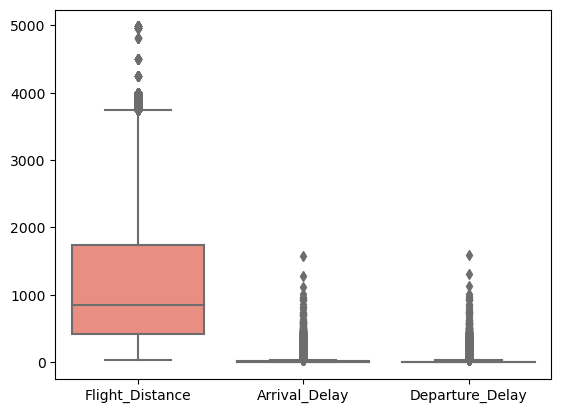

In [7]:
sns.boxplot(data=df[["Flight_Distance", "Arrival_Delay", "Departure_Delay"]], color="salmon")

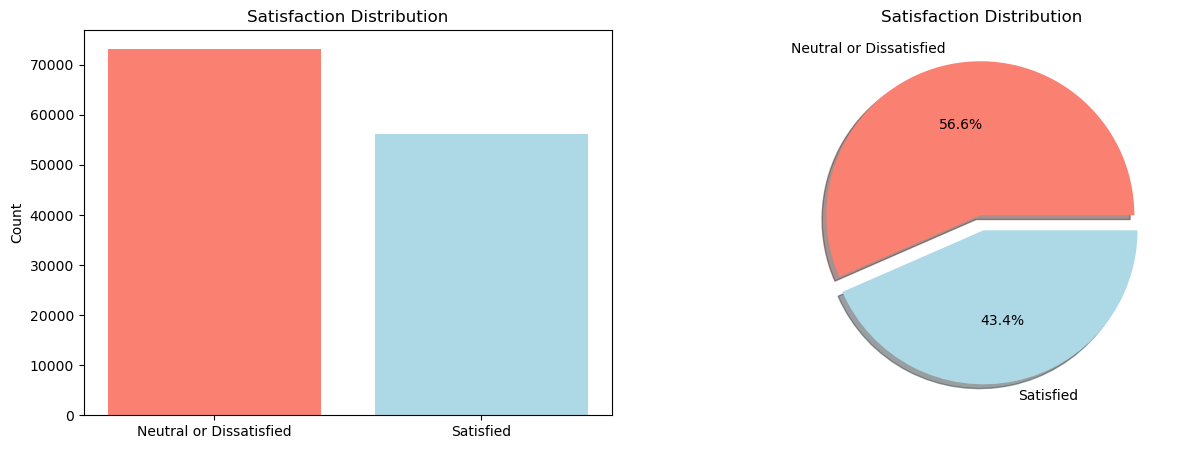

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(df["Satisfaction"].value_counts().index, df["Satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(df["Satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

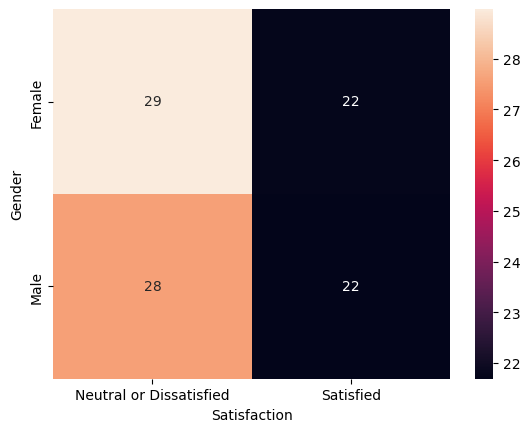

In [9]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(df['Gender'], df['Satisfaction'],normalize=True)*100,annot=True, cbar=True, fmt=".2g");

<Axes: xlabel='Satisfaction', ylabel='Customer_Type'>

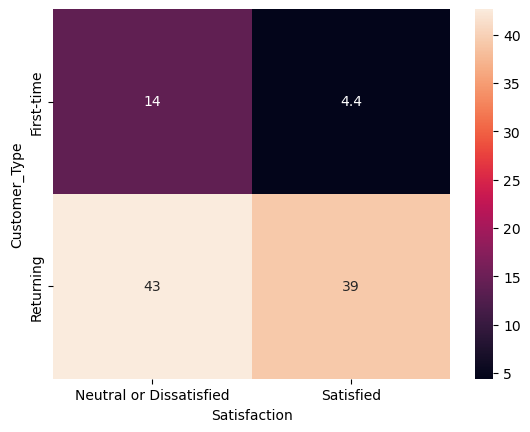

In [10]:
# Check the percentages

sns.heatmap(pd.crosstab(df['Customer_Type'], df['Satisfaction'], normalize=True)*100, annot = True)

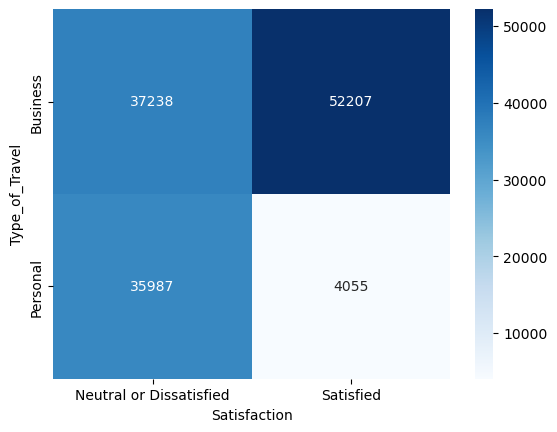

In [11]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(df['Type_of_Travel'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="g");

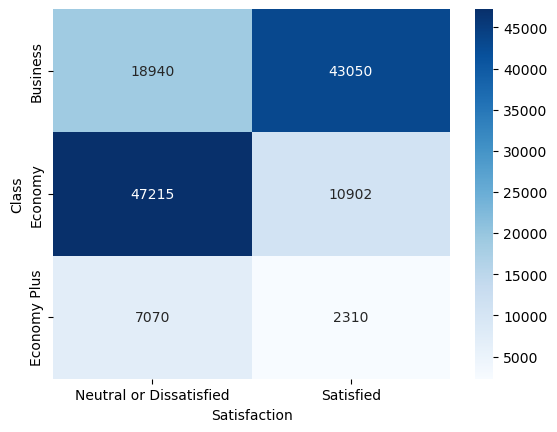

In [12]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(df['Class'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [13]:
significant_list = ['Online_Boarding',
 'Class',
 'Type_of_Travel',
 'In_flight_Entertainment',
 'Seat_Comfort',
 'On_board_Service',
 'Leg_Room_Service',
 'Cleanliness',
 'In_flight_Wifi_Service',
 'Flight_Distance',
 'Baggage_Handling',
 'In_flight_Service',
 'Check_in_Service',
 'Food_and_Drink',
 'Ease_of_Online_Booking',
 'Age',
 'Departure_Delay',
 'Departure_and_Arrival_Time_Convenience',
 'Arrival_Delay']

In [14]:
def plot_func(a,b):
    for category in significant_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=df[category],palette="Pastel1")

        plt.subplot(1,2,2)
        sns.countplot(x=df[category],hue=df['Satisfaction'], palette='Blues')
        plt.show()

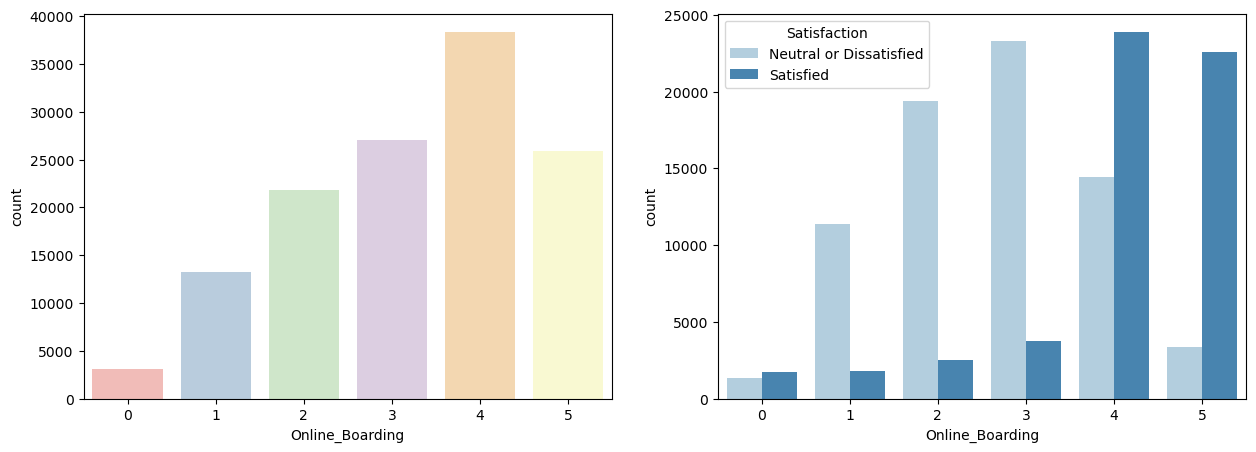

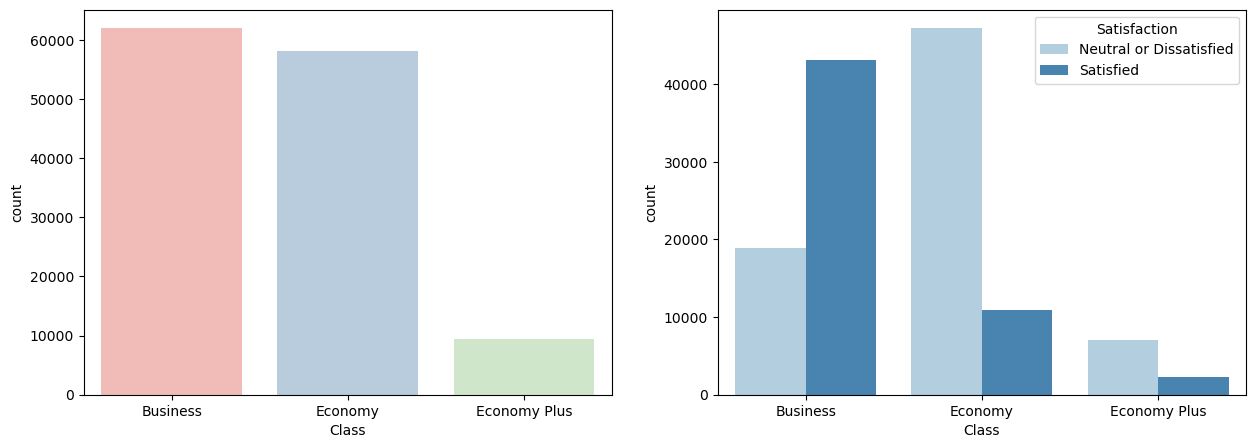

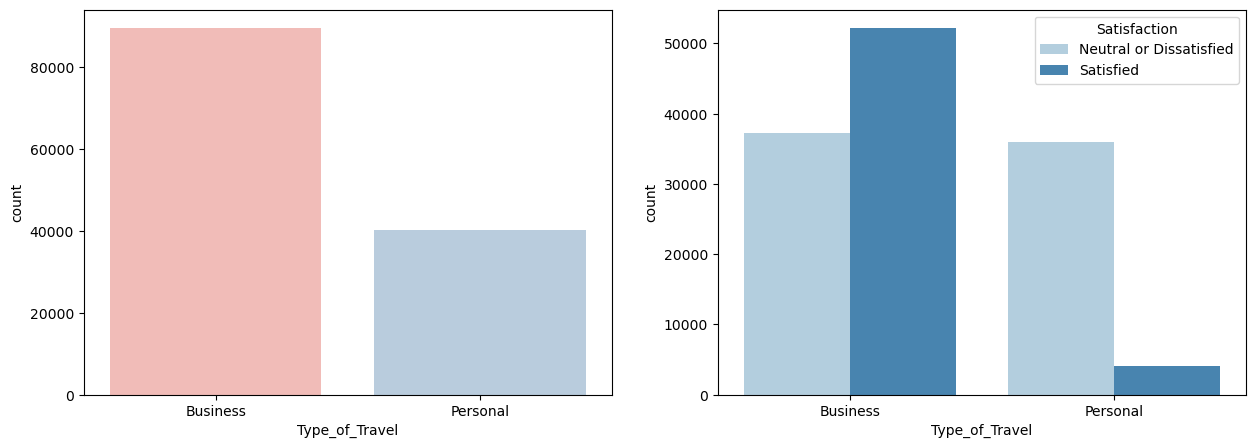

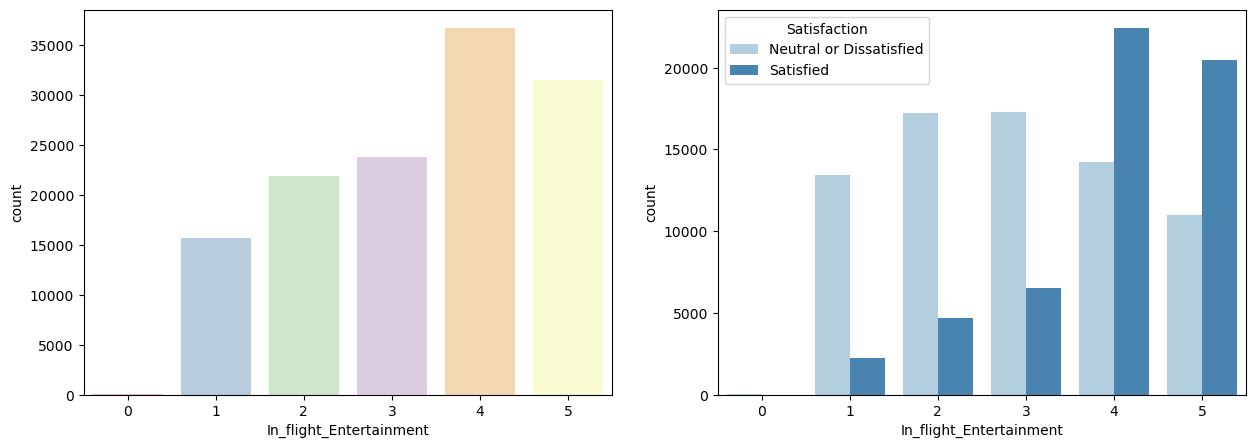

In [15]:
plot_func(0,4)

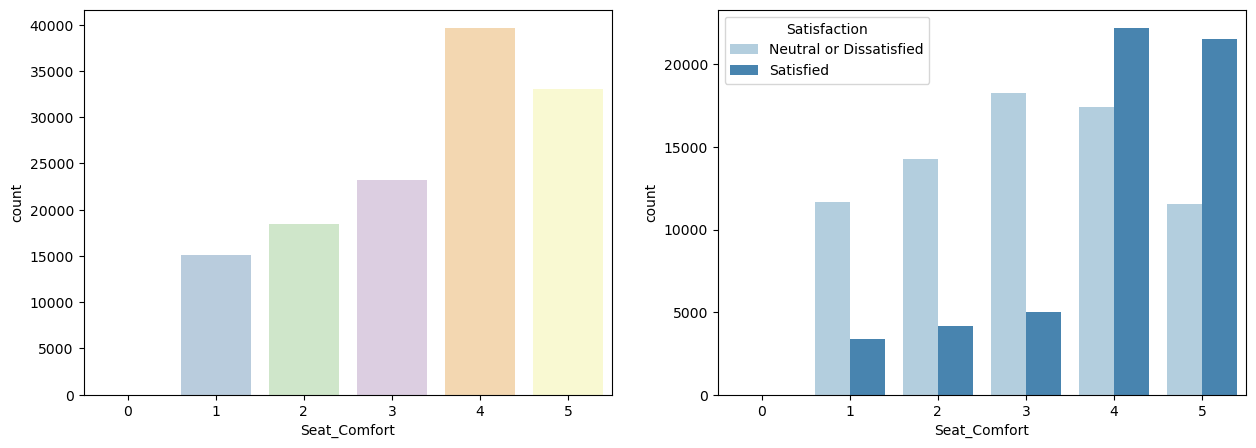

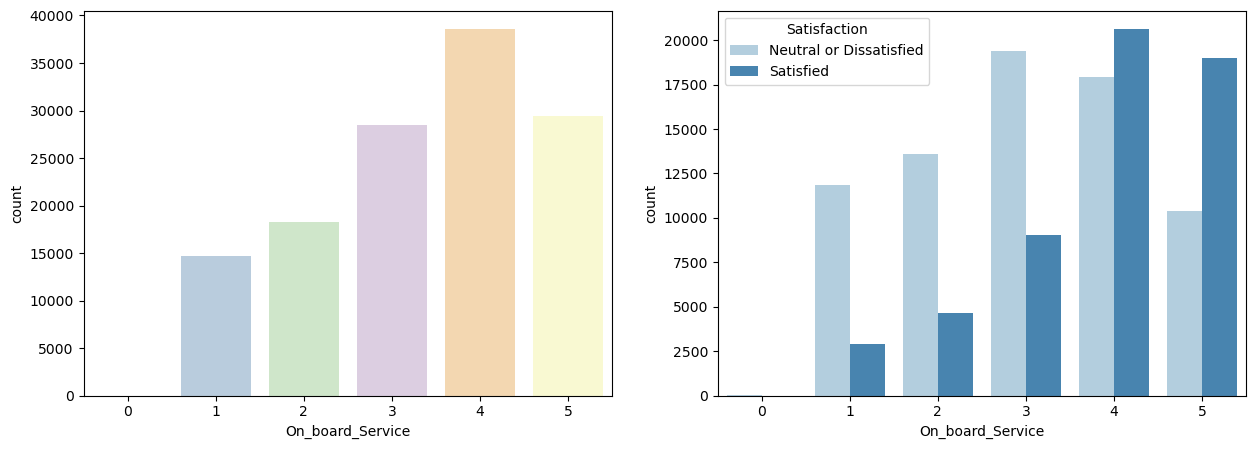

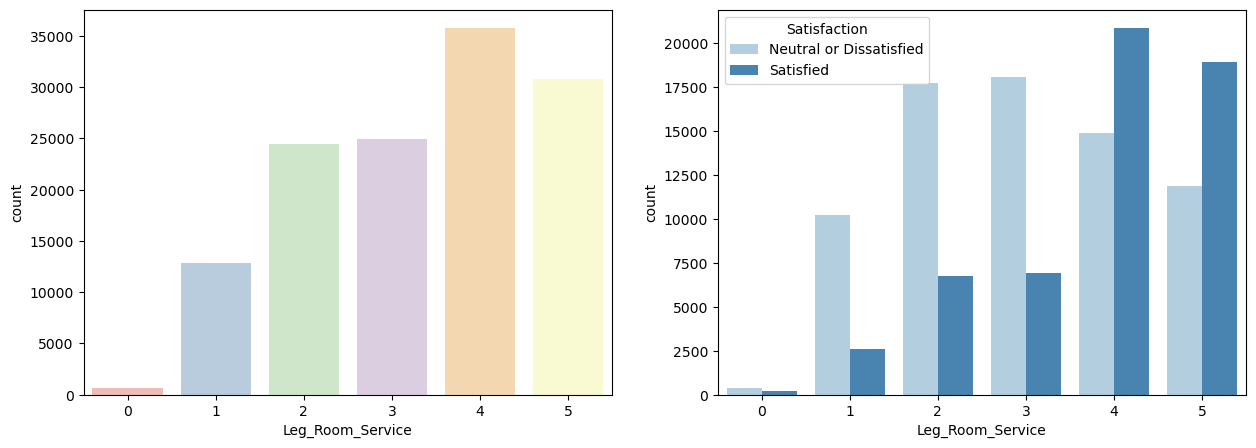

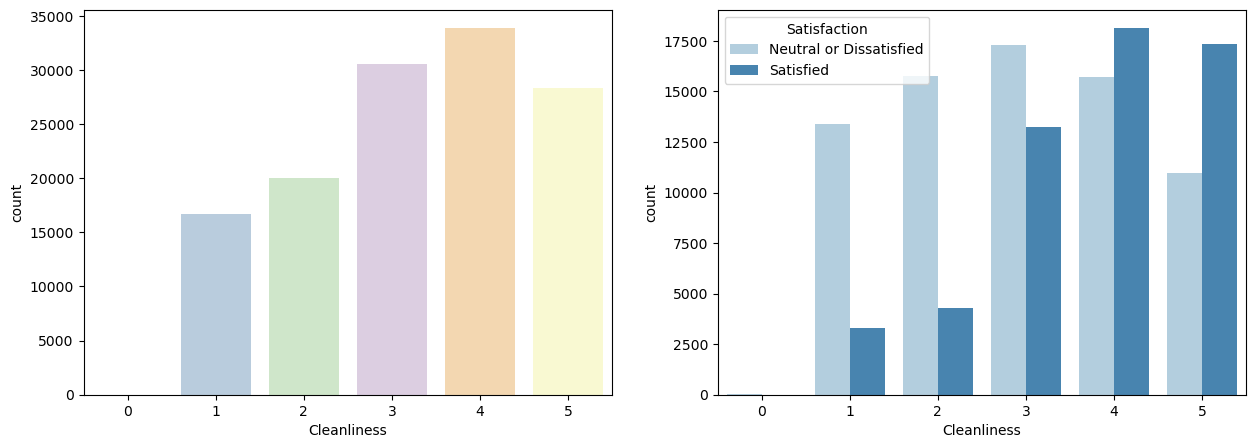

In [16]:
plot_func(4,8)

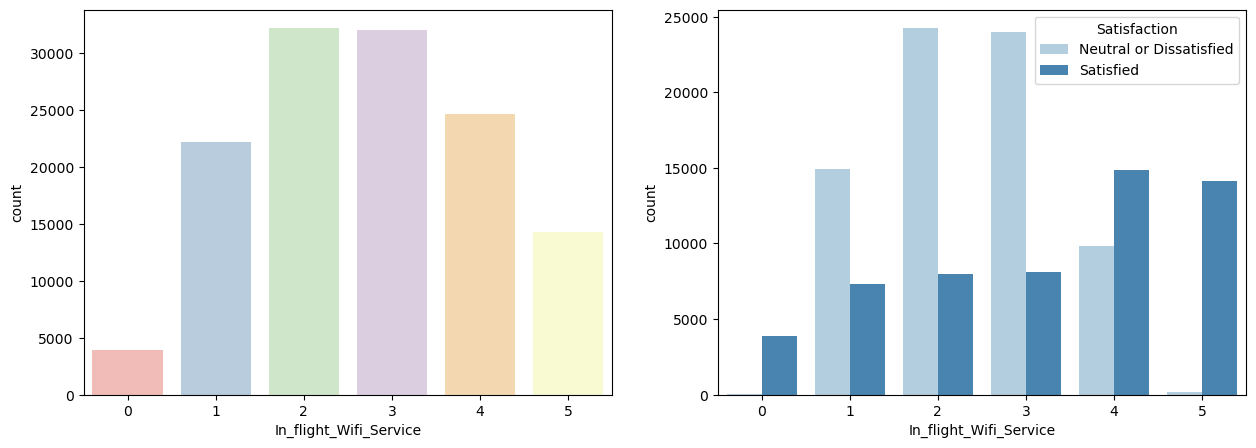

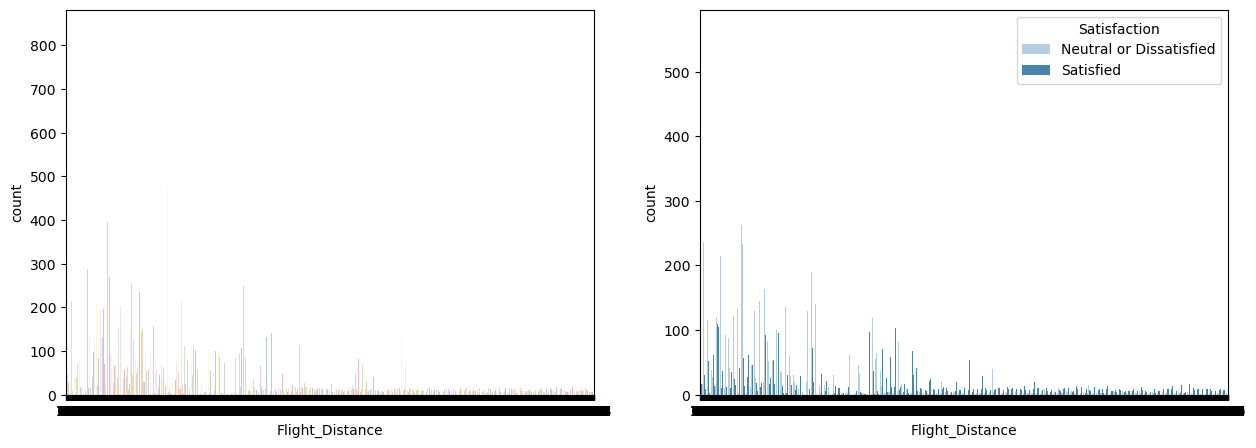

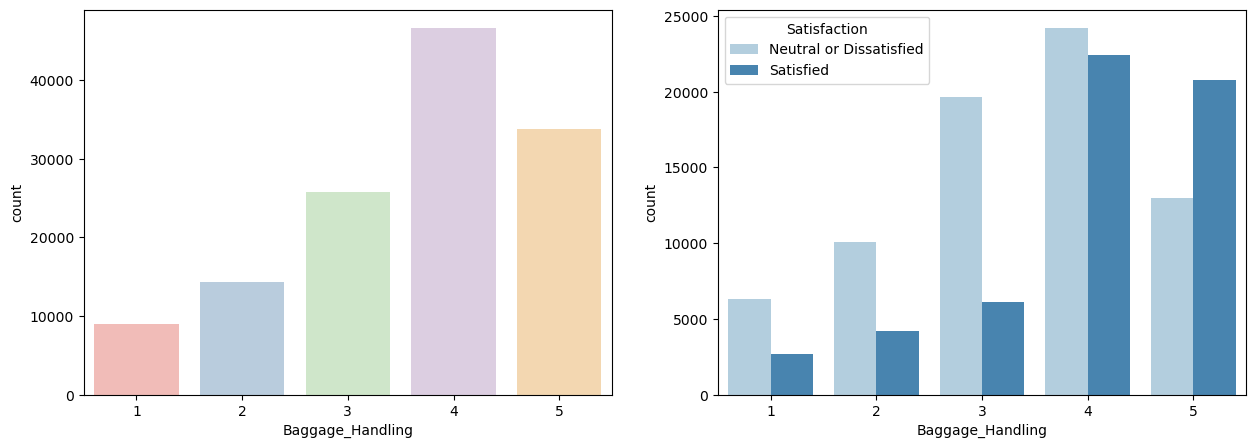

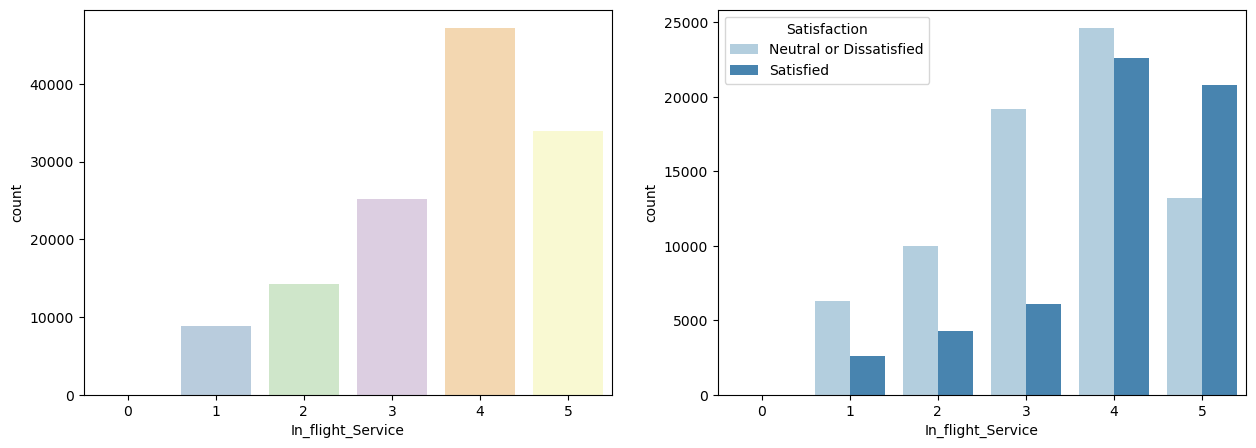

In [17]:
plot_func(8,12)

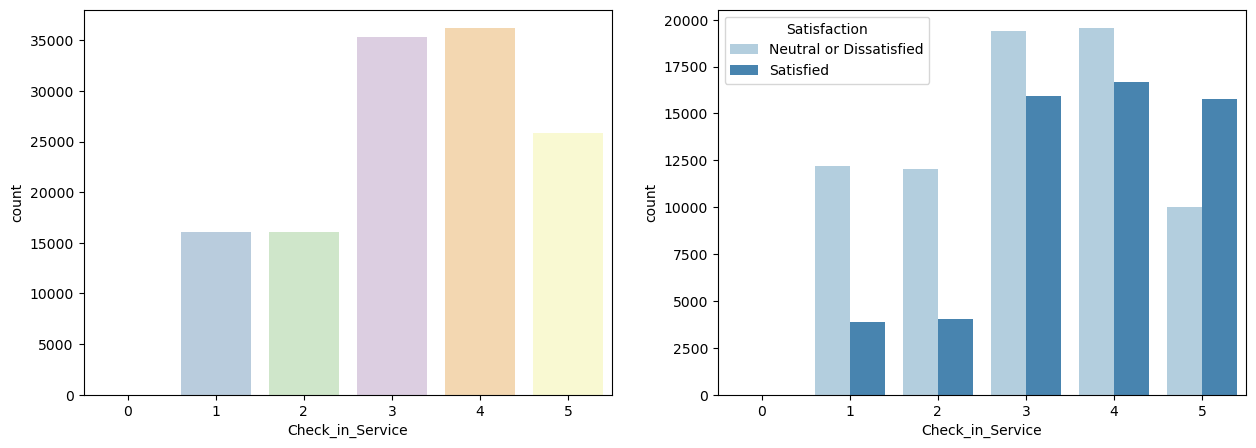

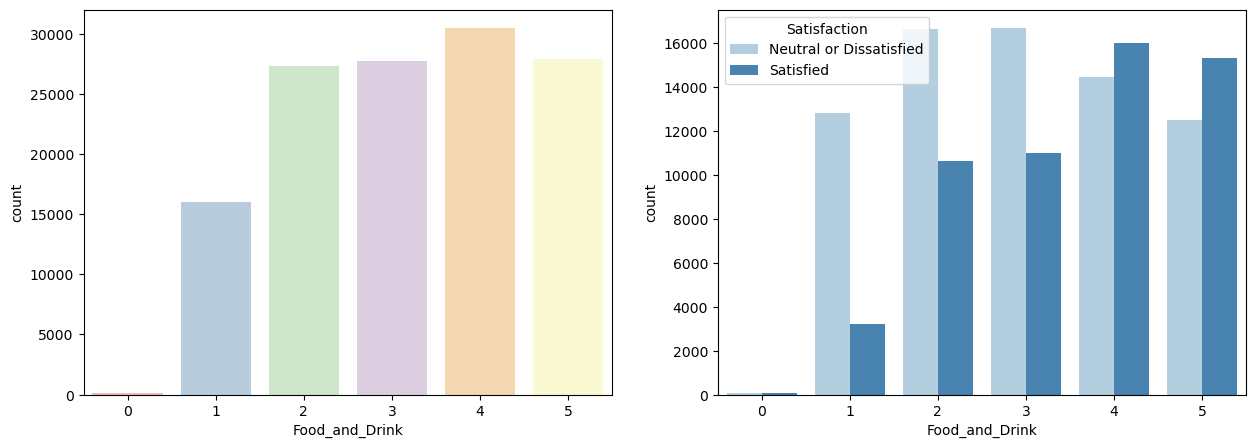

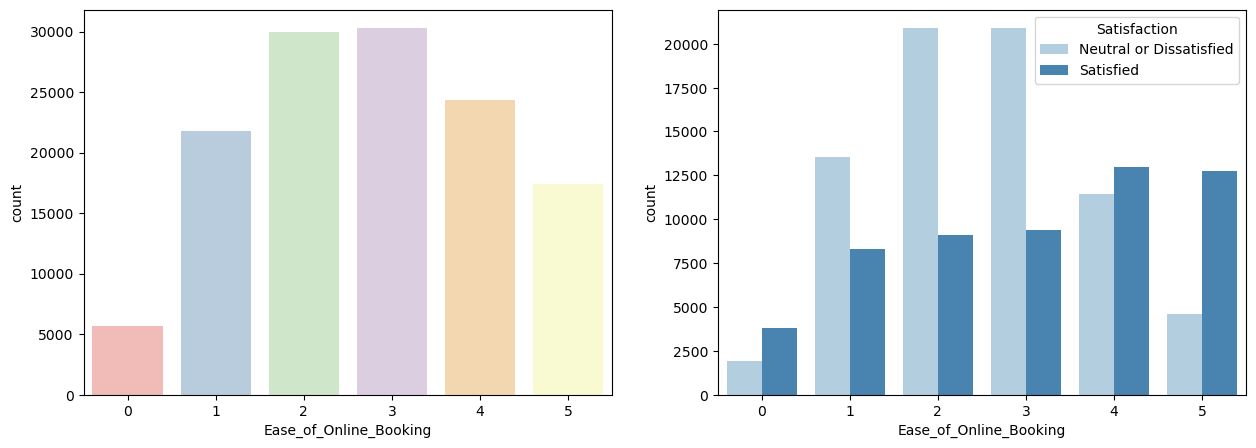

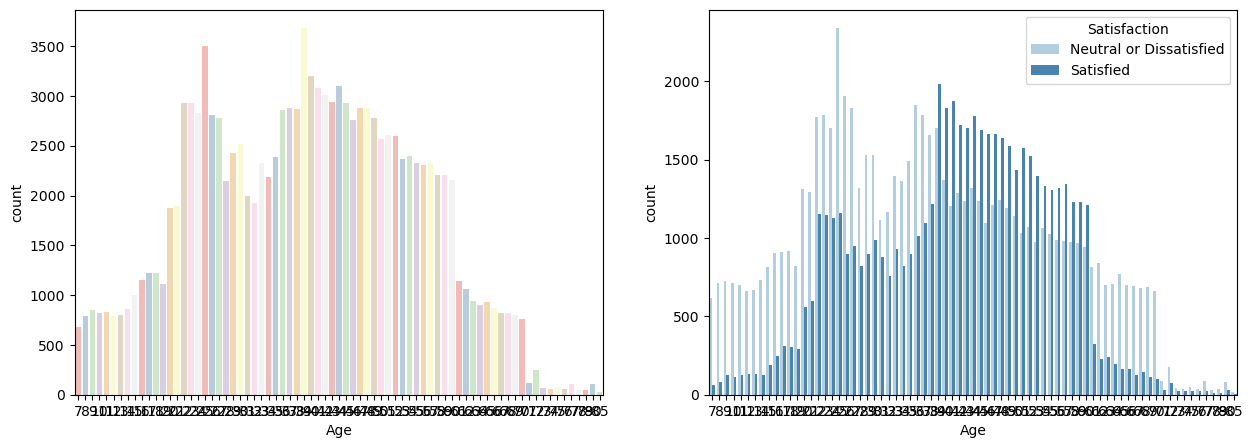

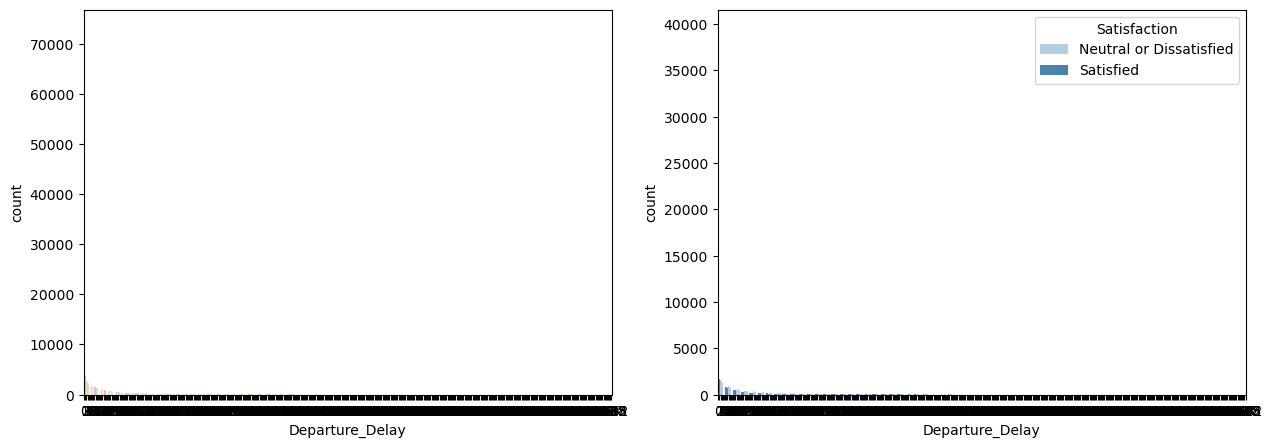

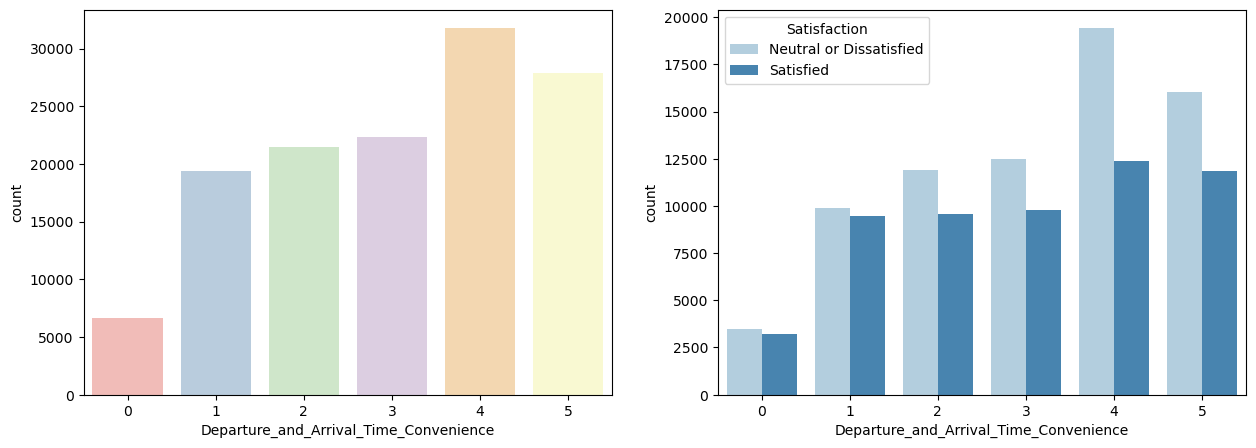


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002722D6616C0> (for post_execute):


KeyboardInterrupt: 

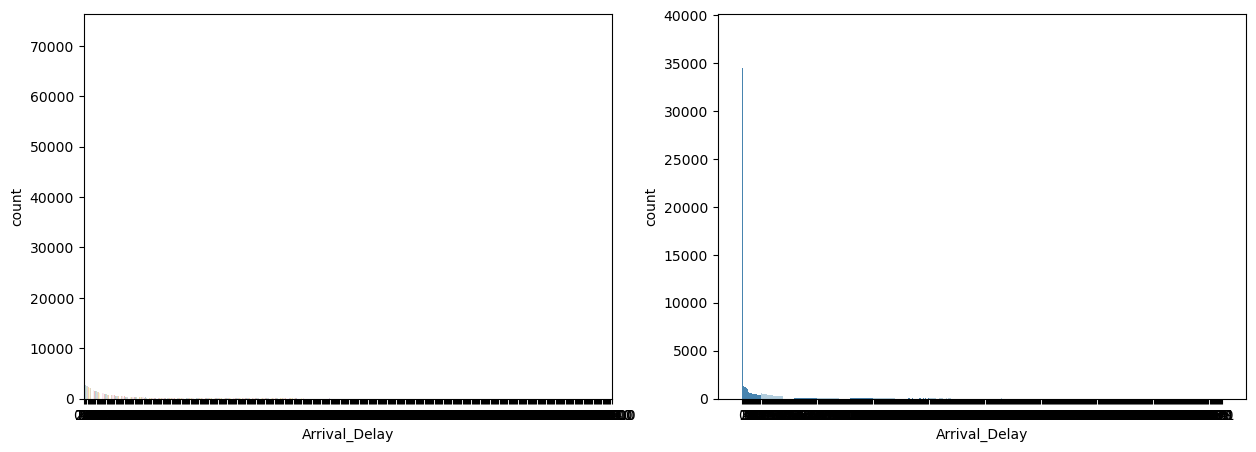

In [18]:
plot_func(12,19)